In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("SuperStore - data.csv")

In [4]:
df.head()

,Order_ID,Customer_ID,Postal_Code,Product_ID,Sales,Quantity,Discount,Profit,Category,Sub-Category,Product_Name,Order_Date,Ship_Date,Ship_Mode,Customer_Name,Segment,Country/Region,City,State,Region
0,CA-2019-152156,CG-12520,42420,FUR-BO-10001798,261.9600,2,0.00,41.9136,Furniture,Bookcases,Bush Somerset Collection Bookcase,11/8/2019,11/11/2019,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,South
1,CA-2019-152156,CG-12520,42420,FUR-CH-10000454,731.9400,3,0.00,219.5820,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",11/8/2019,11/11/2019,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,South
2,CA-2019-138688,DV-13045,90036,OFF-LA-10000240,14.6200,2,0.00,6.8714,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,6/12/2019,6/16/2019,Second Class,Darrin Van Huff,Corporate,United States,Los Angeles,California,West
3,US-2018-108966,SO-20335,33311,FUR-TA-10000577,957.5775,5,0.45,-383.0310,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,10/11/2018,10/18/2018,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South
4,US-2018-108966,SO-20335,33311,OFF-ST-10000760,22.3680,2,0.20,2.5164,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,10/11/2018,10/18/2018,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South


In [6]:
df.dtypes

Order_ID           object
Customer_ID        object
Postal_Code         int64
Product_ID         object
Sales             float64
Quantity            int64
Discount          float64
Profit            float64
Category           object
Sub-Category       object
Product_Name       object
Order_Date         object
Ship_Date          object
Ship_Mode          object
Customer_Name      object
Segment            object
Country/Region     object
City               object
State              object
Region             object
dtype: object

In [11]:
df['Ship_Date'] = pd.to_datetime(df['Ship_Date'])
df['Order_Date'] = pd.to_datetime(df['Order_Date'])

In [14]:
df[['Ship_Date', 'Order_Date']].dtypes

Ship_Date     datetime64[ns]
Order_Date    datetime64[ns]
dtype: object

In [16]:
# Check for nan 
df[df.isna().any(axis=1)]

,Order_ID,Customer_ID,Postal_Code,Product_ID,Sales,Quantity,Discount,Profit,Category,Sub-Category,Product_Name,Order_Date,Ship_Date,Ship_Mode,Customer_Name,Segment,Country/Region,City,State,Region


In [18]:
# Check for duplicate data
df[df.duplicated()]

,Order_ID,Customer_ID,Postal_Code,Product_ID,Sales,Quantity,Discount,Profit,Category,Sub-Category,Product_Name,Order_Date,Ship_Date,Ship_Mode,Customer_Name,Segment,Country/Region,City,State,Region
3406,US-2017-150119,LB-16795,43229,FUR-CH-10002965,281.372,2,0.3,-12.0588,Furniture,Chairs,Global Leather Highback Executive Chair with P...,2017-04-23,2017-04-27,Standard Class,Laurel Beltran,Home Office,United States,Columbus,Ohio,East


In [20]:
# drop duplicates
df = df.drop_duplicates()

In [21]:
df.duplicated().any()

False

In [32]:
# check for inconsistencies
print(df['Category'].value_counts())
print("------------------------------")
print("------------------------------")
print(df['Sub-Category'].value_counts())

Category
Office Supplies    6026
Furniture          2120
Technology         1847
Name: count, dtype: int64
------------------------------
------------------------------
Sub-Category
Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          616
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: count, dtype: int64


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9993 entries, 0 to 9993
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order_ID        9993 non-null   object        
 1   Customer_ID     9993 non-null   object        
 2   Postal_Code     9993 non-null   int64         
 3   Product_ID      9993 non-null   object        
 4   Sales           9993 non-null   float64       
 5   Quantity        9993 non-null   int64         
 6   Discount        9993 non-null   float64       
 7   Profit          9993 non-null   float64       
 8   Category        9993 non-null   object        
 9   Sub-Category    9993 non-null   object        
 10  Product_Name    9993 non-null   object        
 11  Order_Date      9993 non-null   datetime64[ns]
 12  Ship_Date       9993 non-null   datetime64[ns]
 13  Ship_Mode       9993 non-null   object        
 14  Customer_Name   9993 non-null   object        
 15  Segment  

In [34]:
df.head()

,Order_ID,Customer_ID,Postal_Code,Product_ID,Sales,Quantity,Discount,Profit,Category,Sub-Category,Product_Name,Order_Date,Ship_Date,Ship_Mode,Customer_Name,Segment,Country/Region,City,State,Region
0,CA-2019-152156,CG-12520,42420,FUR-BO-10001798,261.9600,2,0.00,41.9136,Furniture,Bookcases,Bush Somerset Collection Bookcase,2019-11-08,2019-11-11,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,South
1,CA-2019-152156,CG-12520,42420,FUR-CH-10000454,731.9400,3,0.00,219.5820,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",2019-11-08,2019-11-11,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,South
2,CA-2019-138688,DV-13045,90036,OFF-LA-10000240,14.6200,2,0.00,6.8714,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,2019-06-12,2019-06-16,Second Class,Darrin Van Huff,Corporate,United States,Los Angeles,California,West
3,US-2018-108966,SO-20335,33311,FUR-TA-10000577,957.5775,5,0.45,-383.0310,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,2018-10-11,2018-10-18,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South
4,US-2018-108966,SO-20335,33311,OFF-ST-10000760,22.3680,2,0.20,2.5164,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,2018-10-11,2018-10-18,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South


<Axes: >

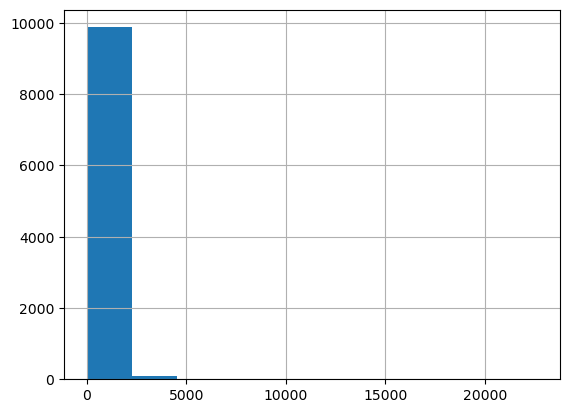

In [35]:
df['Sales'].hist()

In [37]:
df['Sales'].max() - df['Sales'].min()

22638.036

<Axes: xlabel='Sales', ylabel='Count'>

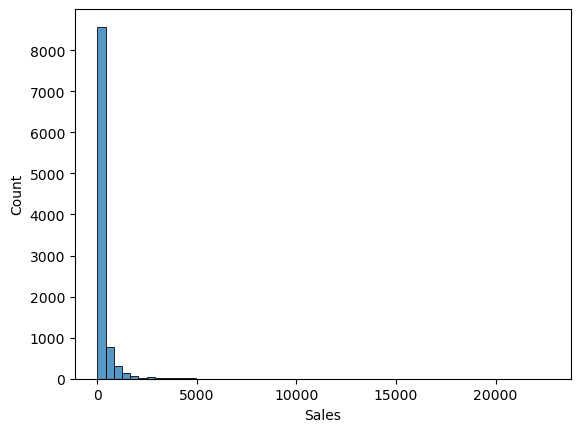

In [81]:
sns.histplot(data=df, x='Sales', bins=55)

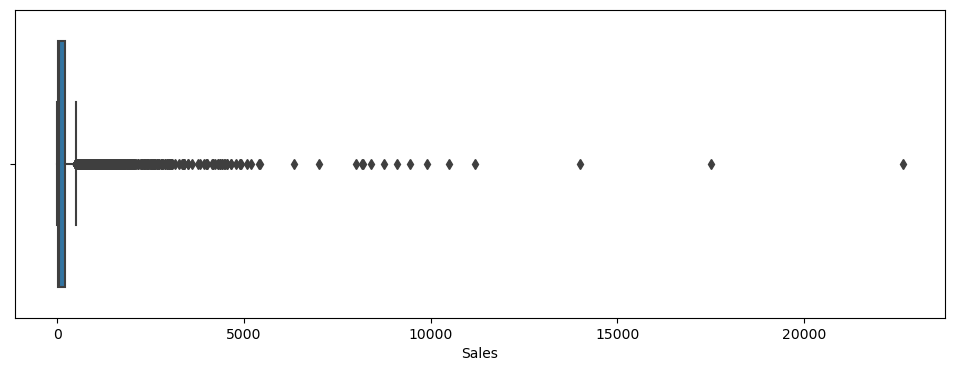

In [72]:
plt.figure(figsize=(12,4))
sns.boxplot(data=df, x='Sales')
plt.show()

In [83]:
q1, q2, q3 = np.percentile(df.Sales, (25, 50, 75))

iqr = q3 - q1
iqr

192.66

## Sales Data Distribution Analysis

Based on the data analysis, we can make the following observations about the sales data distribution:

* **Central Tendency:**
    * **Most of the sales data (50%) falls between 17.28 and 209.94.** This indicates that the majority of sales fall within this central range.
    * **The median sales value is 54.48.** This signifies that half of the sales data has values below 54.48, and the other half has values above it.

* **Spread:**
    * **The interquartile range (IQR) is 192.66.** A large IQR suggests significant dispersion of data points around the median. This implies that the sales data is spread out rather than tightly clustered.

* **Outliers:**
    * While the analysis identifies potential outliers below -271.71 and above 498.93, sales values cannot be negative. Therefore, our focus should be on values exceeding 498.93 as potential outliers in the sales data.

This analysis provides insights into the central tendency, spread, and potential outliers within the sales data.


In [87]:
min_sales = q1 - 1.5*iqr
max_sales = q3 + 1.5*iqr

min_sales, q1, q2, q3, max_sales

(-271.71000000000004, 17.28, 54.48, 209.94, 498.93)

In [91]:
df[df['Sales'] > 498.93].sample(10)

,Order_ID,Customer_ID,Postal_Code,Product_ID,Sales,Quantity,Discount,Profit,Category,Sub-Category,...,Order_Date,Ship_Date,Ship_Mode,Customer_Name,Segment,Country/Region,City,State,Region,LogSales
6635,CA-2020-144498,MB-18085,28205,TEC-PH-10004977,627.168,4,0.2,70.5564,Technology,Phones,...,2020-05-06,2020-05-06,Same Day,Mick Brown,Consumer,United States,Charlotte,North Carolina,South,6.442808
2413,CA-2017-151295,JA-15970,90045,FUR-TA-10002356,629.064,3,0.2,31.4532,Furniture,Tables,...,2017-11-12,2017-11-16,Standard Class,Joseph Airdo,Consumer,United States,Los Angeles,California,West,6.445821
7632,US-2020-158526,KH-16360,40214,FUR-CH-10002602,1207.840,8,0.0,314.0384,Furniture,Chairs,...,2020-12-29,2021-01-01,Second Class,Katherine Hughes,Consumer,United States,Louisville,Kentucky,South,7.097417
7081,CA-2019-106950,JE-15715,28205,TEC-AC-10002049,1012.680,3,0.2,303.8040,Technology,Accessories,...,2019-09-02,2019-09-06,Standard Class,Joe Elijah,Consumer,United States,Charlotte,North Carolina,South,6.921343
5959,CA-2019-127138,DK-13225,94109,FUR-CH-10003746,770.352,3,0.2,77.0352,Furniture,Chairs,...,2019-03-12,2019-03-15,Second Class,Dean Katz,Corporate,United States,San Francisco,California,West,6.648145
9847,CA-2020-169327,MH-17290,90008,FUR-FU-10004188,511.500,5,0.0,132.9900,Furniture,Furnishings,...,2020-09-02,2020-09-04,Second Class,Marc Harrigan,Home Office,United States,Los Angeles,California,West,6.239301
3028,CA-2020-116855,AI-10855,23320,FUR-CH-10003846,504.900,5,0.0,80.7840,Furniture,Chairs,...,2020-12-17,2020-12-21,Standard Class,Arianne Irving,Consumer,United States,Chesapeake,Virginia,South,6.226339
515,CA-2020-127432,AD-10180,59405,TEC-CO-10003236,2999.950,5,0.0,1379.9770,Technology,Copiers,...,2020-01-22,2020-01-27,Standard Class,Alan Dominguez,Home Office,United States,Great Falls,Montana,West,8.006684
6687,CA-2018-165162,HG-15025,90032,OFF-ST-10003470,1117.920,4,0.0,55.8960,Office Supplies,Storage,...,2018-05-14,2018-05-21,Standard Class,Hunter Glantz,Consumer,United States,Los Angeles,California,West,7.020119
5961,CA-2017-140732,MA-17560,90004,TEC-PH-10001425,575.928,9,0.2,57.5928,Technology,Phones,...,2017-11-11,2017-11-13,Second Class,Matt Abelman,Home Office,United States,Los Angeles,California,West,6.357717


In [93]:
# Standard Deviation

mean = df['Sales'].mean()
sd = df['Sales'].std()

print(mean, sd)

229.8528458220755 623.2760738589199


In [102]:
outliers = [sale for sale in df['Sales'] if(sale < mean - 4*sd) or (sale > mean + 4*sd)]
print("Potential outliers:", outliers)

Potential outliers: [3083.43, 8159.952, 3347.37, 3059.982, 3991.98, 4355.168, 2735.952, 6354.95, 2999.95, 7999.98, 3059.982, 4899.93, 3610.848, 3040.0, 3149.93, 2807.84, 4663.736, 3999.95, 4548.81, 8187.65, 11199.968, 22638.48, 2799.96, 2934.33, 3359.952, 4164.05, 2799.96, 3080.0, 9449.95, 10499.97, 4799.984, 9099.93, 4367.896, 2879.952, 2799.96, 3504.9, 3930.072, 2999.95, 2799.944, 4912.59, 4228.704, 4158.912, 2888.127, 2793.528, 5199.96, 8399.976, 5443.96, 4007.84, 4164.05, 6999.96, 3266.376, 17499.95, 2887.056, 4416.174, 3499.93, 5399.91, 3812.97, 4499.985, 4535.976, 3404.5, 3357.6, 2973.32, 13999.96, 4643.8, 2803.92, 2939.93, 8749.95, 3050.376, 5083.96, 4899.93, 9892.74, 4476.8, 4305.552, 2803.92, 3785.292, 4297.644, 3406.664, 3023.928, 4404.9, 3393.68, 2799.96]


In [110]:
pd.DataFrame(outliers).sort_values(0, ascending=False)

,0
21,22638.480
51,17499.950
62,13999.960
20,11199.968
29,10499.970
...,...
34,2799.960
80,2799.960
38,2799.944
43,2793.528


In [113]:
df[df['Sales'] >= 22638.480]

,Order_ID,Customer_ID,Postal_Code,Product_ID,Sales,Quantity,Discount,Profit,Category,Sub-Category,...,Order_Date,Ship_Date,Ship_Mode,Customer_Name,Segment,Country/Region,City,State,Region,LogSales
2697,CA-2017-145317,SM-20320,32216,TEC-MA-10002412,22638.48,6,0.5,-1811.0784,Technology,Machines,...,2017-03-18,2017-03-23,Standard Class,Sean Miller,Home Office,United States,Jacksonville,Florida,South,10.027451


In [115]:
df.groupby('Category')[['Sales', 'Profit']].agg('sum')

,Sales,Profit
Category,,
Furniture,741718.4233,18463.3316
Office Supplies,719047.0320,122490.8008
Technology,836154.0330,145454.9481


In [122]:
category_sales_and_profit = df.groupby('Category')[['Sales', 'Profit']].agg('sum').reset_index()

**Office Supplies and Technology have higher profit margins compared to Furniture.**

In [131]:
profit_margin = category_sales_and_profit.assign(profit_margin = category_sales_and_profit.apply(lambda x: (x['Profit'] / x['Sales'])*100, axis=1))

In [257]:
profit_margin

,Category,Sales,Profit,profit_margin
0,Furniture,741718.4233,18463.3316,2.489264
1,Office Supplies,719047.0320,122490.8008,17.035158
2,Technology,836154.0330,145454.9481,17.395712


## Sales Comparison

Technology leads the pack with the highest sales of **$836,154.03**, followed by Office Supplies at **$719,047.03** and Furniture at **$741,718.42**.

## Profit Comparison

Technology reigns supreme again with the highest profit of **$145,454.95**. Office Supplies follows closely behind at **$122,490.80**, while Furniture lags with **$18,463.33**.

## Profit Margin Analysis

While Technology boasts the highest sales and profit, Office Supplies holds its own with a respectable profit margin of **17.04%**, just slightly behind Technology's **17.40%**. Furniture, on the other hand, struggles with a lower profit margin of only **2.49%**, indicating room for improvement in converting sales into profit.

**Key Takeaways:**

* Technology dominates in both sales and profit.
* Office Supplies maintains a competitive profit margin despite lower sales.
* Furniture needs to address its low profit margin to increase efficiency.


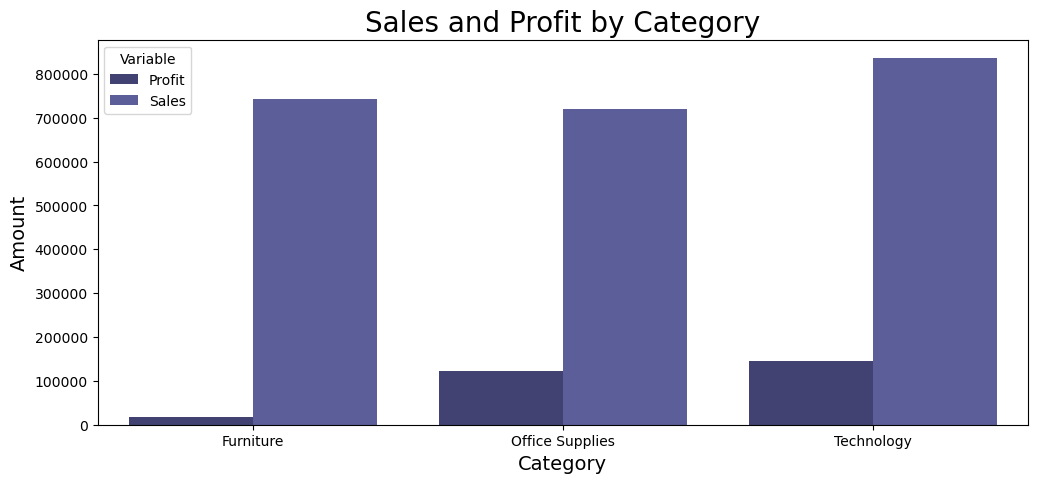

In [254]:
plt.figure(figsize=(12,5))

sns.barplot(data=profit_margin.melt(id_vars="Category", value_vars=['Profit', 'Sales']),
               x='Category', y='value', hue='variable', palette='tab20b')

plt.title("Sales and Profit by Category", fontsize=20)
plt.xlabel("Category", fontsize=14)
plt.ylabel("Amount", fontsize=14)
plt.legend(title="Variable")
plt.show()

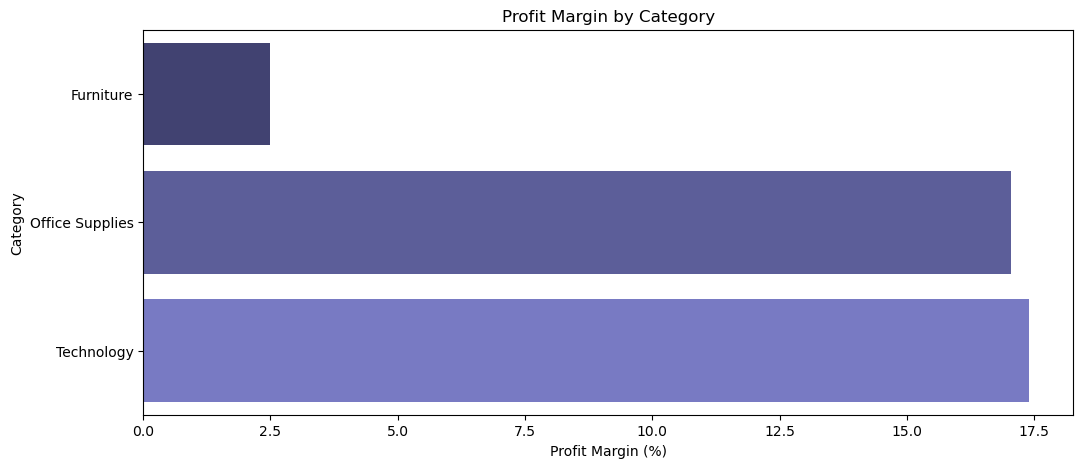

In [149]:
plt.figure(figsize=(12,5))

sns.barplot(x='profit_margin', y='Category', data=profit_margin, palette='tab20b')
plt.title("Profit Margin by Category")
plt.xlabel("Profit Margin (%)")
plt.ylabel("Category")
plt.show()

In [229]:
df[['Sales','Quantity','Discount','Profit']].describe()

,Sales,Quantity,Discount,Profit
count,9993.000000,9993.000000,9993.000000,9993.000000
mean,229.852846,3.789753,0.156188,28.660971
std,623.276074,2.225149,0.206457,234.271476
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.731000
50%,54.480000,3.000000,0.200000,8.671000
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


In [231]:
df.head()

,Order_ID,Customer_ID,Postal_Code,Product_ID,Sales,Quantity,Discount,Profit,Category,Sub-Category,...,Order_Date,Ship_Date,Ship_Mode,Customer_Name,Segment,Country/Region,City,State,Region,LogSales
0,CA-2019-152156,CG-12520,42420,FUR-BO-10001798,261.9600,2,0.00,41.9136,Furniture,Bookcases,...,2019-11-08,2019-11-11,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,South,5.572002
1,CA-2019-152156,CG-12520,42420,FUR-CH-10000454,731.9400,3,0.00,219.5820,Furniture,Chairs,...,2019-11-08,2019-11-11,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,South,6.597064
2,CA-2019-138688,DV-13045,90036,OFF-LA-10000240,14.6200,2,0.00,6.8714,Office Supplies,Labels,...,2019-06-12,2019-06-16,Second Class,Darrin Van Huff,Corporate,United States,Los Angeles,California,West,2.748552
3,US-2018-108966,SO-20335,33311,FUR-TA-10000577,957.5775,5,0.45,-383.0310,Furniture,Tables,...,2018-10-11,2018-10-18,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,6.865450
4,US-2018-108966,SO-20335,33311,OFF-ST-10000760,22.3680,2,0.20,2.5164,Office Supplies,Storage,...,2018-10-11,2018-10-18,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,3.151368


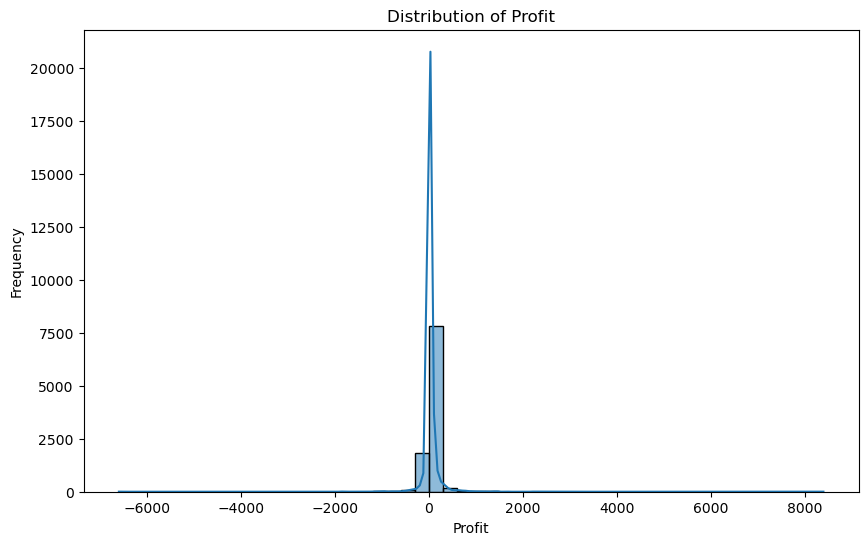

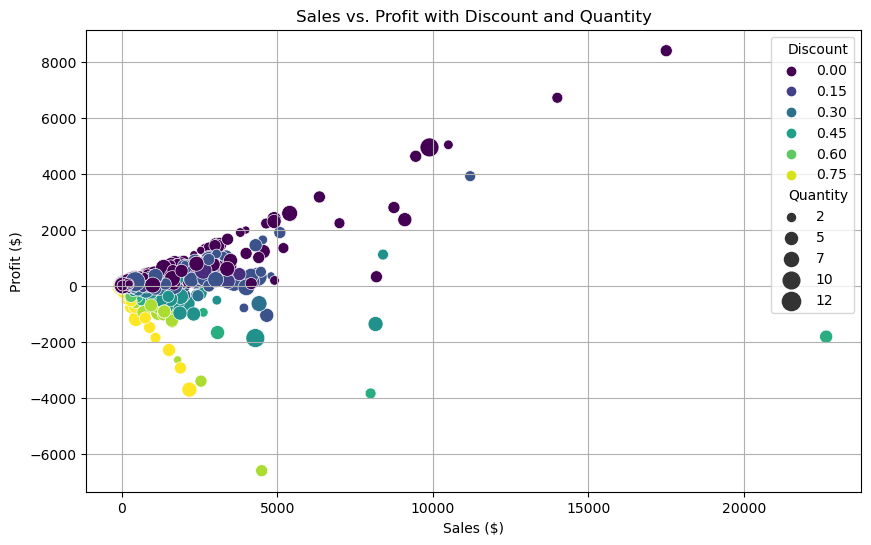

In [253]:
# Histogram untuk Profit
plt.figure(figsize=(10, 6))
sns.histplot(df['Profit'], bins=50, kde=True)
plt.title('Distribution of Profit')
plt.xlabel('Profit')
plt.ylabel('Frequency')
plt.show()

# Scatter plot untuk Sales vs. Profit
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Sales', y='Profit', data=df, hue='Discount', palette='viridis', size='Quantity', sizes=(20, 200))
plt.title('Sales vs. Profit with Discount and Quantity')
plt.xlabel('Sales ($)')
plt.ylabel('Profit ($)')
plt.grid(True)
plt.show()

In [242]:
df.groupby(['Category', 'Sub-Category']).aggregate({"Sales":"sum",
                                                    "Profit":"sum",
                                                    "Discount":"sum"}).reset_index()

,Category,Sub-Category,Sales,Profit,Discount
0,Furniture,Bookcases,114879.9963,-3472.5560,48.14
1,Furniture,Chairs,328167.7310,26602.2251,104.70
2,Furniture,Furnishings,91705.1640,13059.1436,132.40
3,Furniture,Tables,206965.5320,-17725.4811,83.35
4,Office Supplies,Appliances,107532.1610,18138.0054,77.60
5,Office Supplies,Art,27118.7920,6527.7870,59.60
6,Office Supplies,Binders,203412.7330,30221.7633,567.00
7,Office Supplies,Envelopes,16476.4020,6964.1767,20.40
8,Office Supplies,Fasteners,3024.2800,949.5182,17.80
9,Office Supplies,Labels,12486.3120,5546.2540,25.00


## Category and Sub-Category Analysis

### Furniture

* **Bookcases:**
    * Sales: **$114,879.9963**
    * Profit: **-$3,472.5560** (Loss)
    * Discount: **$48.14**
    * Insight: Bookcases are experiencing losses despite relatively high sales. The discount is not very significant, so the losses may be due to high production costs or low selling prices.

* **Chairs:**
    * Sales: **$328,167.7310**
    * Profit: **$26,602.2251**
    * Discount: **$104.70**
    * Insight: Chairs show high sales and profit, with a discount that is not too large compared to sales. This product has a good profit margin.

* **Furnishings:**
    * Sales: **$91,705.1640**
    * Profit: **$13,059.1436**
    * Discount: **$132.40**
    * Insight: Furnishings have good profit even with a relatively large discount. This suggests that this product may have a fairly high profit margin.

* **Tables:**
    * Sales: **$206,965.5320**
    * Profit: **-$17,725.4811** (Loss)
    * Discount: **$83.35**
    * Insight: Tables are experiencing significant losses despite high sales. The discount is not very large, so further investigation is needed into production costs or pricing.

### Office Supplies

* **Appliances:**
    * Sales: **$107,532.1610**
    * Profit: **$18,138.0054**
    * Discount: **$77.60**
    * Insight: Appliances show good profit with fairly high sales and a moderate discount.

* **Art:**
    * Sales: **$27,118.7920**
    * Profit: **$6,527.7870**
    * Discount: **$59.60**
    * Insight: Art has a good profit margin with sales that are not too high but still generate positive profit.

* **Binders:**
    * Sales: **$203,412.7330**
    * Profit: **$30,221.7633**
    * Discount: **$567.00**
    * Insight: Binders have good profit even with a very high discount. This indicates a large sales volume or a high profit margin.

* **Supplies:**
    * Sales: **$46,673.5380**
    * Profit: **-$1,189.0995** (Loss)
    * Discount: **$14.60**
    * Insight: Supplies are experiencing a small loss despite relatively low sales and a low discount.

### Technology

* **Accessories:**
    * Sales: **$167,380.3180**
    * Profit: **$41,936.6357**
    * Discount: **$60.80**
    * Insight: Accessories show good sales and profit with a relatively low discount, indicating a good profit margin.

* **Copiers:**
    * Sales: **$149,528.0300**
    * Profit: **$55,617.8249**
    * Discount: **$11.00**
    * Insight: Copiers show very high profit with a very low discount, indicating that this product is very profitable.

* **Phones:**
    * Sales: **$330,007.0540**
    * Profit: **$44,515.7306**
    * Discount: **$137.40**
    * Insight: Phones show high sales and profit despite a fairly large discount, indicating that this product has a large sales volume or a high profit margin.


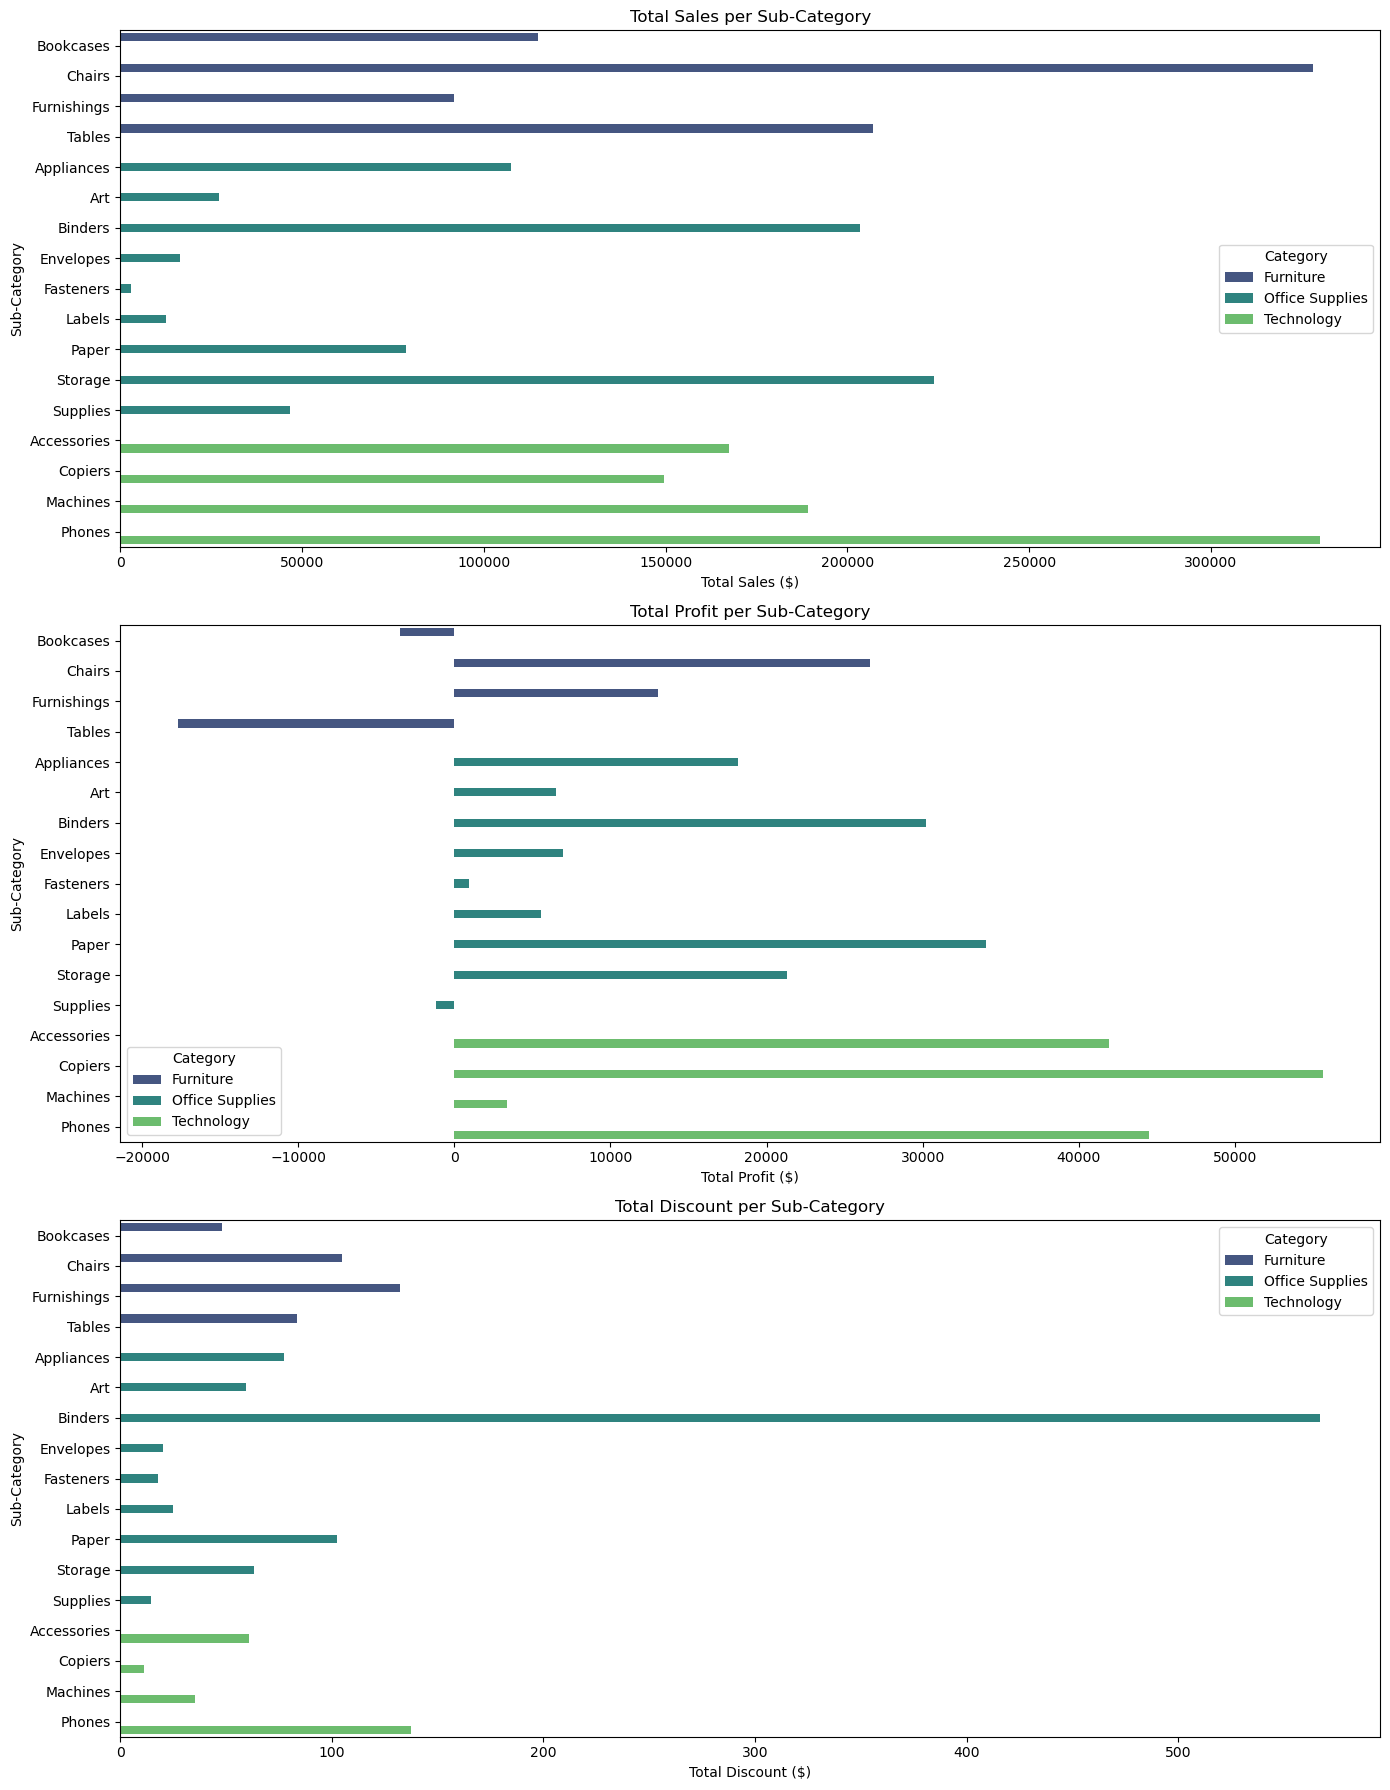

In [246]:
# Bar plot untuk Sales, Profit, dan Discount per Sub-Category
fig, axes = plt.subplots(3, 1, figsize=(14, 18))

sns.barplot(ax=axes[0], x='Sales', y='Sub-Category', hue='Category', data=df.groupby(['Category', 'Sub-Category']).aggregate({"Sales":"sum", "Profit":"sum", "Discount":"sum"}).reset_index(), palette='viridis')
axes[0].set_title('Total Sales per Sub-Category')
axes[0].set_xlabel('Total Sales ($)')
axes[0].set_ylabel('Sub-Category')

sns.barplot(ax=axes[1], x='Profit', y='Sub-Category', hue='Category', data=df.groupby(['Category', 'Sub-Category']).aggregate({"Sales":"sum", "Profit":"sum", "Discount":"sum"}).reset_index(), palette='viridis')
axes[1].set_title('Total Profit per Sub-Category')
axes[1].set_xlabel('Total Profit ($)')
axes[1].set_ylabel('Sub-Category')

sns.barplot(ax=axes[2], x='Discount', y='Sub-Category', hue='Category', data=df.groupby(['Category', 'Sub-Category']).aggregate({"Sales":"sum", "Profit":"sum", "Discount":"sum"}).reset_index(), palette='viridis')
axes[2].set_title('Total Discount per Sub-Category')
axes[2].set_xlabel('Total Discount ($)')
axes[2].set_ylabel('Sub-Category')

plt.tight_layout()
plt.show()


## Conclusion

### Subcategories with Losses

* **Furniture - Bookcases** and **Furniture - Tables** experience significant losses despite having fairly high sales. The discounts offered are not very large, so the losses are likely due to low selling prices or high production costs.
* **Office Supplies - Supplies** also experiences losses despite lower sales and minimal discounts. This suggests an underlying issue with pricing or production costs.

### Subcategories with Low Profit

Some subcategories, while not making losses, show relatively low profit compared to high sales. This could be due to excessive discounts or thin profit margins.

### Recommendations

**Evaluate Pricing and Production Cost Strategies:**

* Review the cost structure and pricing strategies for loss-making subcategories like Bookcases, Tables, and Supplies. Ensure selling prices are sufficient to cover production costs and provide a reasonable profit margin.
* Conduct cost analysis to identify cost components that can be reduced or optimized.

**Optimize Discounts:**

* Evaluate the effectiveness of offered discounts. While discounts can increase sales volume, excessive discounts can erode profit margins. Adjust discounts to remain attractive to customers without significantly reducing profit.
* Consider loyalty programs or promotions that focus not only on price cuts but also on adding value for customers.

**Focus on High-Margin Products:**

* Increase promotion and sales for products that show high profit margins such as Copiers, Accessories, and Phones. These products can help improve overall profitability.
* Consider expanding the product line of proven profitable products or adding product variations within these subcategories.

**Market and Competitor Analysis:**

* Conduct market analysis to understand how your products compare to competitors. Are your product prices competitive? Are there any features or value additions that can be improved to make products more attractive without lowering prices?
* Identify customer segments that are most responsive to discounts and tailor marketing strategies to target these segments.

**Inventory Management:**

* Ensure that inventory for loss-making or low-profit products is well-managed to avoid overstock that can add storage costs and lead to losses.
* Consider reducing or discontinuing production of products that consistently make losses or show poor performance.

### Next Steps

To implement the recommendations above, here are some concrete steps that can be taken:

**Production Cost Audit:**

* Conduct a thorough audit of production costs for loss-making subcategories. Identify high-cost components and find ways to reduce them.

**Pricing Strategy Revision:**

* Use break-even analysis to set minimum prices that ensure no losses.
* Consider adjusting prices based on demand elasticity and customer response.

**Smart Discount Program Implementation:**

* Create targeted discount programs based on sales data analysis and customer preferences. For example, use larger discounts on high-margin products and smaller discounts on low-margin products.

**Product Development:**

* Conduct research and development to improve or introduce new, more profitable products. Focus on innovation that can increase product value without significantly adding to production costs.

**Sales and Marketing Team Training:**

* Ensure that the sales and marketing team is trained to promote high-margin products and understand the new pricing strategies.

By implementing these analyses and actions, the company can improve overall profitability and ensure that each product subcategory contributes positively to profit.

In [269]:
texas = df.pivot_table(index=['Sub-Category', 'State'],
               values=['Discount', 'Sales', 'Profit'],
               aggfunc="sum").reset_index().set_index('Discount').sort_index().query("State.isin(['Texas'])")
texas

,Sub-Category,State,Profit,Sales
Discount,,,,
1.00,Copiers,Texas,1629.9615,5639.8720
3.80,Supplies,Texas,-837.2795,4516.7600
4.80,Fasteners,Texas,80.7357,332.4640
5.20,Machines,Texas,-2666.8434,19546.2240
6.00,Labels,Texas,200.4020,583.6000
6.00,Envelopes,Texas,848.1760,2530.6480
8.64,Bookcases,Texas,-2391.1377,14493.4588
9.90,Tables,Texas,-2216.6766,15760.6610
14.20,Art,Texas,316.3538,2369.5280


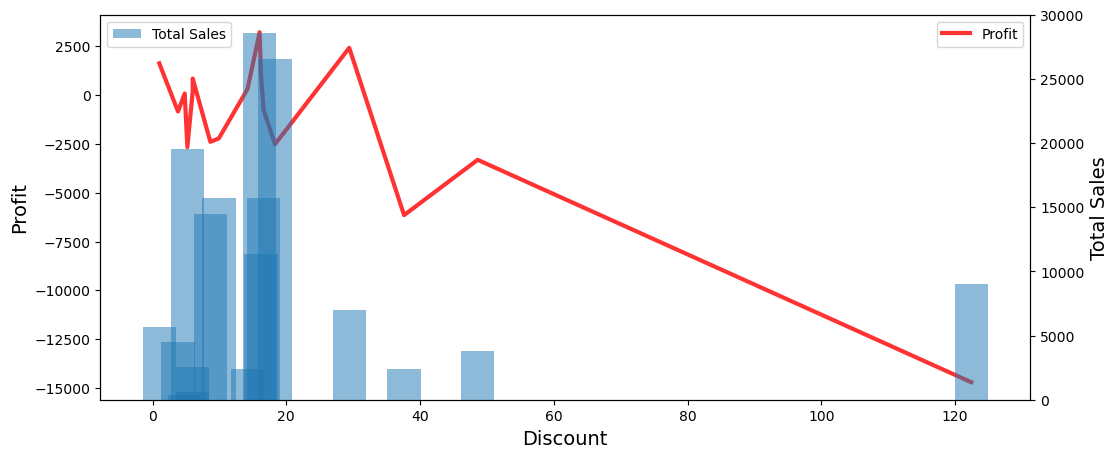

In [272]:
fig, ax = plt.subplots(figsize=(12, 5))

width = 5

ax.plot(texas['Profit'],
       color='r',
       alpha=.8,
       label='Profit',
       linewidth=3)

ax.legend()

ax2 = ax.twinx()

ax2.bar(texas.index,
        texas["Sales"],
        width=width,
        alpha=.5,
        label='Total Sales')

ax.set_ylabel("Profit", fontsize=14)
ax.set_xlabel("Discount", fontsize=14)

# Memberi nama pada sumbu sebelah kanan
ax2.set_ylabel("Total Sales", fontsize=14)


ax2.legend(loc="upper left")

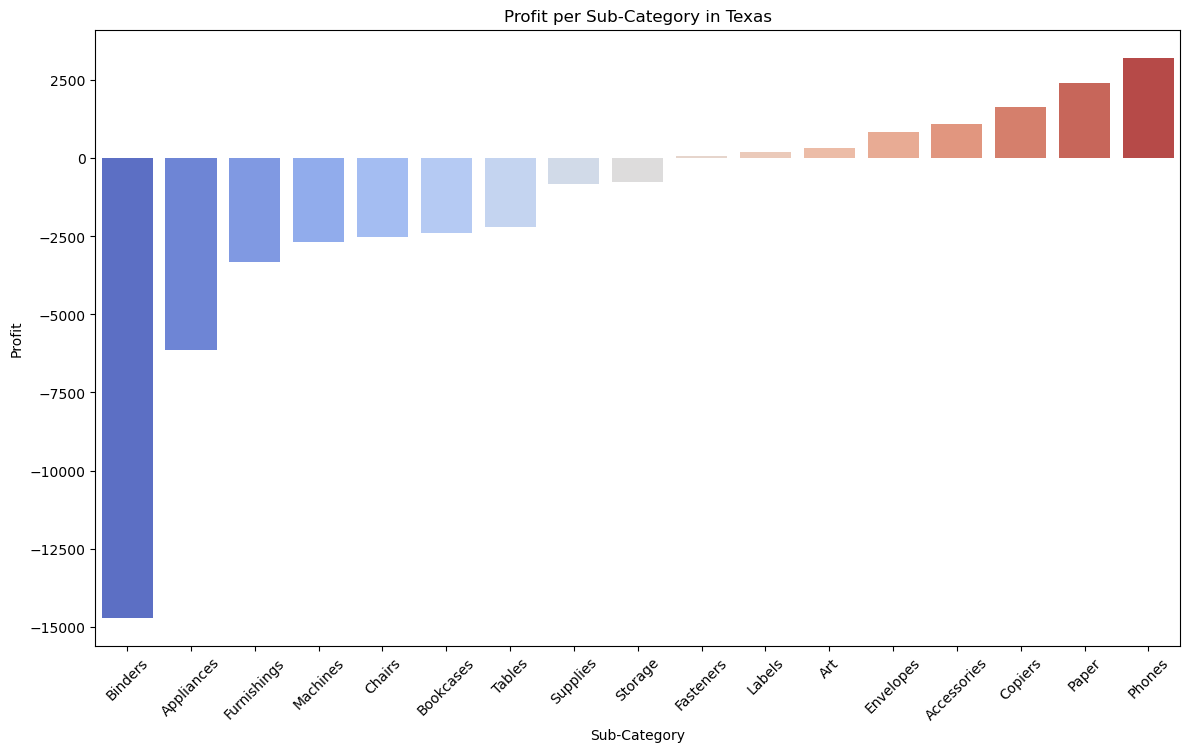

In [275]:
# Bar plot untuk Profit dan Sales
plt.figure(figsize=(14, 8))
sns.barplot(data=texas.reset_index(), x='Sub-Category', y='Profit', palette='coolwarm', order=texas.reset_index().sort_values('Profit')['Sub-Category'])
plt.xticks(rotation=45)
plt.title('Profit per Sub-Category in Texas')
plt.xlabel('Sub-Category')
plt.ylabel('Profit')
plt.show()